In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

In [2]:
def load_data():  
    return pd.read_csv('../data/raw/train.csv')  

order_data = load_data()

In [3]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8138 entries, 0 to 8137
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8138 non-null   int64  
 1   Order ID       8138 non-null   object 
 2   Order Date     8138 non-null   object 
 3   Ship Date      8138 non-null   object 
 4   Ship Mode      8138 non-null   object 
 5   Customer ID    8138 non-null   object 
 6   Customer Name  8138 non-null   object 
 7   Segment        8138 non-null   object 
 8   Country        8138 non-null   object 
 9   City           8138 non-null   object 
 10  State          8138 non-null   object 
 11  Postal Code    8128 non-null   float64
 12  Region         8138 non-null   object 
 13  Product ID     8138 non-null   object 
 14  Category       8138 non-null   object 
 15  Sub-Category   8138 non-null   object 
 16  Product Name   8138 non-null   object 
 17  Sales          8138 non-null   float64
dtypes: float

In [33]:
order_data.rename(columns={'Row ID':'rowId', 'Order ID':'orderId', 'Order Date':'orderDate', 'Ship Date':'shipDate', 'Ship Mode':'shipMode', 'Customer ID':'customerId', 'Customer Name':'customerName', 'Segment':'segment', 'Country':'country', 'City':'city', 'State':'state', 'Postal Code':'postalCode', 'Region':'region', 'Product ID':'productId', 'Category':'category', 'Sub-Category':'subcategory', 'Product Name':'productName', 'Sales':'sales'}, inplace=True)
order_data.head(3)

,rowId,orderId,orderDate,shipDate,shipMode,customerId,customerName,segment,country,city,state,postalCode,region,productId,category,subcategory,productName,sales
0,7981,CA-2015-103800,1/3/2015,1/7/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,740,CA-2015-112326,1/4/2015,1/8/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2,741,CA-2015-112326,1/4/2015,1/8/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736


In [34]:
def monthly_orders(data):
    monthly_data = data.copy()
    monthly_data.orderDate = monthly_data.orderDate.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('orderDate')['sales'].sum().reset_index()
    monthly_data.orderDate = pd.to_datetime(monthly_data.orderDate)
    return monthly_data

In [35]:
monthly_df = monthly_orders(order_data)
monthly_df.head()

,orderDate,sales
0,2002-01-01,1481.828
1,2002-01-10,1247.684
2,2002-01-11,159.384
3,2002-01-12,1596.016
4,2002-01-13,8795.403


In [37]:
# Duration of dataset
def orders_duration(data):
    data.orderDate = pd.to_datetime(data.orderDate)
    number_of_days = data.orderDate.max() - data.orderDate.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(number_of_years, 'years')
    
orders_duration(order_data)

1336 days
3.66027397260274 years


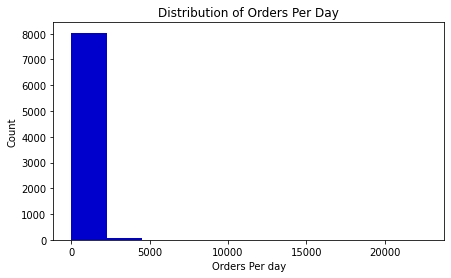

In [41]:
def orders_per_day():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(order_data.sales, color='mediumblue')
    
    ax.set(xlabel = "Orders Per day",
           ylabel = "Count",
           title = "Distribution of Orders Per Day")
    
orders_per_day()